<a href="https://colab.research.google.com/github/miguelaram2016/FreeCodeCamp-Projects/blob/main/fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.20.0-dev20250330


In [41]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2025-03-31 01:15:21--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.1’

train-data.tsv.1    100%[===================>] 349.84K  --.-KB/s    in 0.03s   

2025-03-31 01:15:21 (10.6 MB/s) - ‘train-data.tsv.1’ saved [358233/358233]

--2025-03-31 01:15:21--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.1’

valid-data.tsv.1    100%[========

In [42]:
# Load and Preprocess Data

train_data = pd.read_csv(train_file_path, sep='\t', header=None, names=['label', 'text'])
test_data = pd.read_csv(test_file_path, sep='\t', header=None, names=['label', 'text'])
train_data['text'] = train_data['text'].str.lower()
test_data['text'] = test_data['text'].str.lower()
train_data['label'] = train_data['label'].map({'ham': 0, 'spam': 1})
test_data['label'] = test_data['label'].map({'ham': 0, 'spam': 1})
train_labels = train_data.pop('label')
test_labels = test_data.pop('label')
train_data = train_data['text']
test_data = test_data['text']
train_data = np.array(train_data.values.tolist())
test_data = np.array(test_data.values.tolist())
train_labels = np.array(train_labels.values.tolist())
test_labels = np.array(test_labels.values.tolist())
vocab = []
for text in train_data:
  for word in text.split(' '):
    vocab.append(word)
vocab = sorted(set(vocab))
vocab_size = len(vocab)

In [43]:
# Tokenize and Pad Data
max_length = 40
tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data)

train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

max_length = 40  # Use longer sequence length for better context
padded_train_data = keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length, padding='post')
padded_test_data = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length, padding='post')

In [44]:
# Build and Train Neural Network

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, 32),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(padded_train_data, train_labels, epochs=10, validation_data=(padded_test_data, test_labels))

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.8440 - loss: 0.4003 - val_accuracy: 0.9727 - val_loss: 0.0697
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9856 - val_loss: 0.0454
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9946 - loss: 0.0205 - val_accuracy: 0.9871 - val_loss: 0.0451
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9992 - loss: 0.0068 - val_accuracy: 0.9885 - val_loss: 0.0442
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9998 - loss: 0.0033 - val_accuracy: 0.9885 - val_loss: 0.0513
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9878 - val_loss: 0.0584
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9878 - val_loss: 0.0639
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9996 - loss: 0.0012 - val_ac

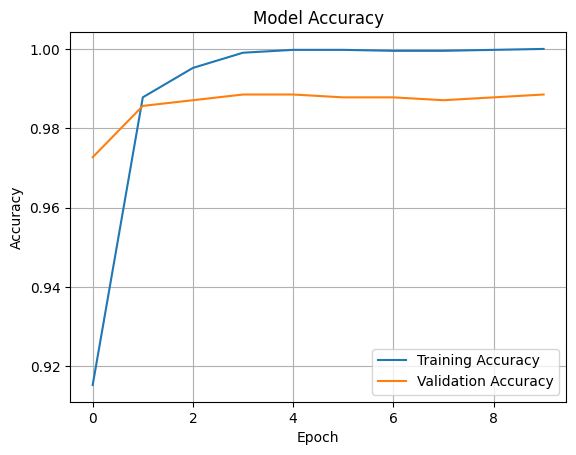

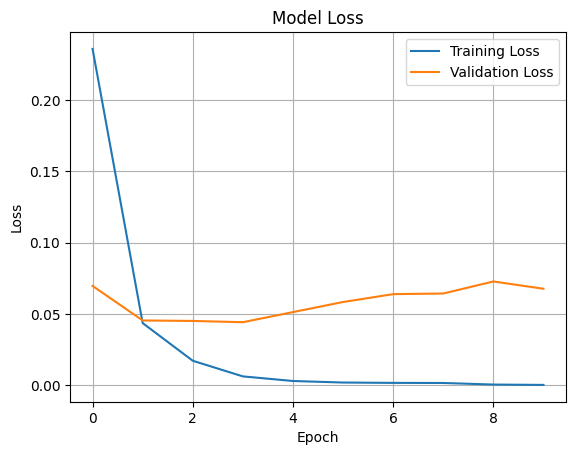

In [45]:
# Visualize Training History

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  prediction = []
  # pred_text = pred_text.lower()

  sequence = tokenizer.texts_to_sequences([pred_text])
  padded = keras.preprocessing.sequence.pad_sequences(sequence, maxlen=max_length, padding='post')
  prediction = model.predict(padded)
  if prediction[0][0] > 0.001:
    prediction = [prediction[0][0], 'spam']
  else:
    prediction = [prediction[0][0], 'ham']

  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
[np.float32(9.206577e-05), 'ham']


In [47]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
You passed the challenge. Great job!
